In [1]:
# Random Forest 

In [2]:
import pandas as pd
#Dataframe
df =pd.read_csv('../final_desequilibre.csv')


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



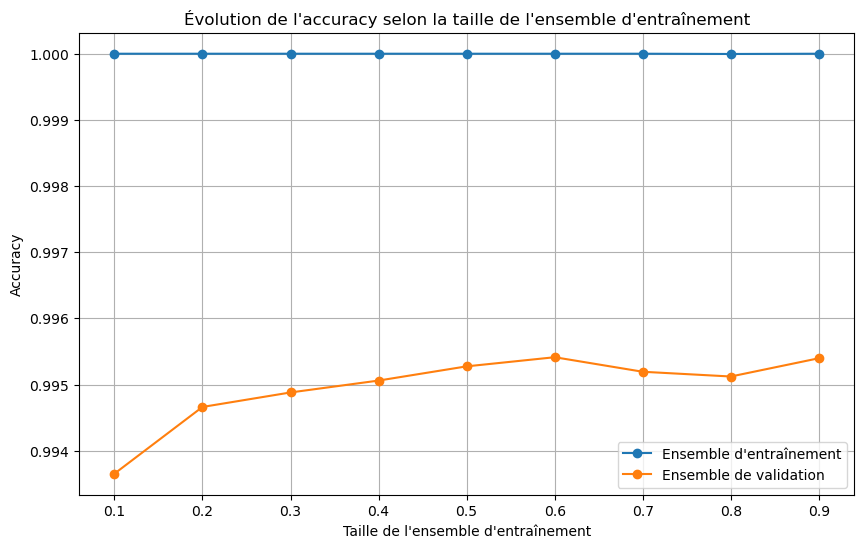

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Créez une liste pour stocker l'accuracy d'entraînement et de validation à chaque itération
train_accuracy = []
validation_accuracy = []

# Créez un éventail de tailles d'ensemble d'entraînement
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for size in train_sizes:
    # Divisez les données en ensembles d'entraînement et de validation
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - size), random_state=42)
    X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    # Créez un modèle Random Forest et ajustez-le sur l'ensemble d'entraînement
    rf_model = RandomForestClassifier(random_state=1)
    rf_model.fit(X_train, y_train)
    
    # Prédisez sur les ensembles d'entraînement et de validation
    y_pred_train = rf_model.predict(X_train)
    y_pred_validation = rf_model.predict(X_validation)
    
    # Calculez l'accuracy sur les ensembles d'entraînement et de validation
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    validation_accuracy.append(accuracy_score(y_validation, y_pred_validation))

# Tracez l'évolution de l'accuracy sur l'ensemble d'entraînement et de validation
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracy, label='Ensemble d\'entraînement', marker='o')
plt.plot(train_sizes, validation_accuracy, label='Ensemble de validation', marker='o')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Accuracy')
plt.title('Évolution de l\'accuracy selon la taille de l\'ensemble d\'entraînement')
plt.legend()
plt.grid(True)
plt.show()


In [5]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

# Calcul des métriques sur l'ensemble de validation
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
precision_validation = precision_score(y_validation, y_pred_validation)
recall_validation = recall_score(y_validation, y_pred_validation)
f1_validation = f1_score(y_validation, y_pred_validation)
auc_validation = roc_auc_score(y_validation, y_pred_validation)

# Affichage des métriques sur l'ensemble de validation
print("Métriques sur l'ensemble de validation:")
print(f"Accuracy: {accuracy_validation:.2f}")
print(f"Precision: {precision_validation:.2f}")
print(f"Recall: {recall_validation:.2f}")
print(f"F1-Score: {f1_validation:.2f}")
print(f"auc-Score: {auc_validation:.2f}")


Métriques sur l'ensemble de validation:
Accuracy: 1.00
Precision: 0.93
Recall: 0.88
F1-Score: 0.91
auc-Score: 0.94


In [6]:
# Prédiction sur l'ensemble de test

y_pred_test = rf_model.predict(X_test)

# Calcul des métriques sur l'ensemble de test

acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Calcul de l'AUC
auc = roc_auc_score(y_test, y_pred_test)

randfor_results = pd.DataFrame([['Random forest', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
randfor_results.to_csv('../evaluations/randfor_results.csv', index=False)

randfor_results


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Random forest,0.995766,0.940594,0.894118,0.916767,0.946303


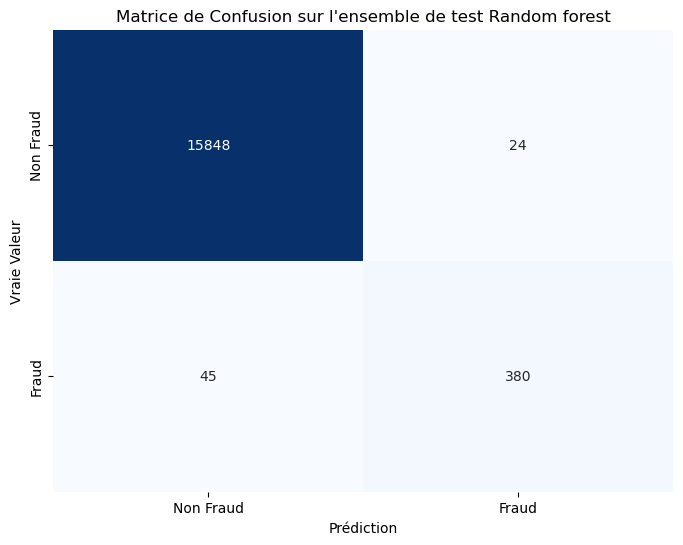

In [7]:

# Matrice de confusion sur l'ensemble de test
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion sur l\'ensemble de test Random forest')
plt.show()


In [8]:
#combien de sous arbres sont construits ,'' ici par défaut ''

n_estimators_used = rf_model.n_estimators
print(f"Nombre d'estimateurs utilisés : {n_estimators_used}")


Nombre d'estimateurs utilisés : 100


In [9]:
#la profondeur maximale de l'arbre

max_tree_depth = max([estimator.tree_.max_depth for estimator in rf_model.estimators_])
print(f"Profondeur maximale des arbres : {max_tree_depth}")


Profondeur maximale des arbres : 63
